In [1]:
import os
path = 'C:/pytest_img/'
os.chdir(path)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
import sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

In [4]:
folder = 'C:/pytest_img/cats_dogs/'
# folder에 있는 내용을 불러들여서 그 내용이 파일이면 리스트에 저장하라
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print(len(files))

25000


cat.1.jpg


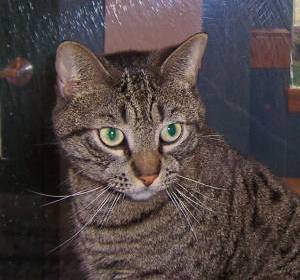

cat.100.jpg


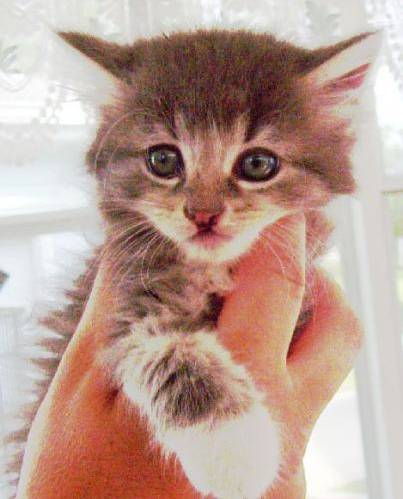

cat.10000.jpg


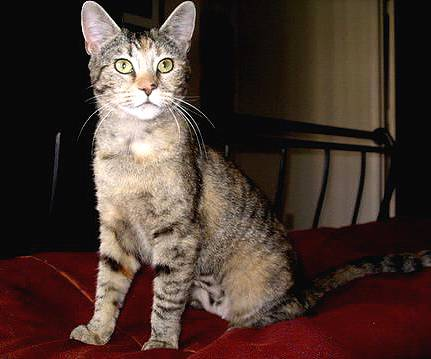

cat.10002.jpg


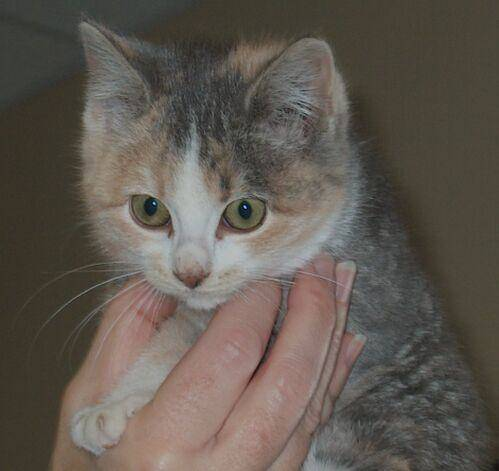

cat.10004.jpg


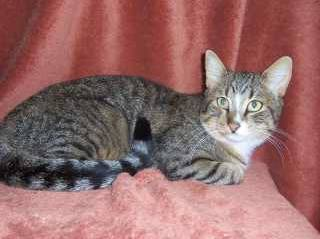

In [12]:
# 두 개 출력
for i in range(1,10,2):
    print(files[i])
    display(_Imgdis(filename= folder + files[i],width = 120, height = 160))

In [14]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

file_names = []
file_labels = []

for _file in files:
    file_names.append(_file)
    label_start = 0
    label_end = _file.find('.')
    label_str = _file[label_start : label_end]
    
    if label_str == 'cat':
        file_labels.append(0)
    elif label_str == 'dog':
        file_labels.append(1)
    else:
        print('Error')
    
print(len(file_names))

25000


In [19]:
os.chdir(folder)
# 한 개 파일 로드
img = load_img(file_names[0])
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [20]:
# PIL 파일을 넘파이 배열로 변환
img_array = img_to_array(img)
print(type(img_array), img_array.dtype, img_array.shape)

<class 'numpy.ndarray'> float32 (374, 500, 3)


In [21]:
# 이미지 shape를 통일 해주는데 너무 크면 컴퓨터에서 메모리 초과하는 경향
# 서로 이미지가 다르므로 20 X 20 사이즈에 맞추기로 한다.
image_height = 20
image_width = 20
channels = 3
dataset = np.ndarray(shape = (len(file_names), image_height, image_width, channels), dtype = np.int32)
print(dataset.shape)

(25000, 20, 20, 3)


In [22]:
# 새로운 디렉토리 생성
# 사이즈 조절된 이미지를 저장할 디렉토리 생성
if not os.path.exists(os.path.join(folder, 'new/')):
    os.makedirs(os.path.join(folder,'new/'))

In [23]:
for count, item in enumerate(file_names):
    img = load_img(file_names[count])
    img = img.resize((20,20), Image.ANTIALIAS)
    img.save(fp = os.path.join(folder, 'new/')+file_names[count])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
display(_Imgdis(filename= folder +'new/'+ files[2]))

In [27]:
# import cv2

# for count, item in enumerate(file_names):
#     img2 = load_img(file_names[count])
#     img_array2 = img_to_array(img2)
#     img_array2 = cv2.resize(img_array2, (20,20))
#     dataset2[count] = img_array2

In [33]:
from tqdm import tqdm

In [34]:
for count, item in tqdm(enumerate(file_names)):
    img = load_img(os.path.join(folder + 'new/')+ file_names[count])
    img_array = img_to_array(img)
    dataset[count] = img_array

25000it [00:06, 4142.20it/s]


In [35]:
dataset.shape

(25000, 20, 20, 3)

In [39]:
display(_Imgdis(filename = os.path.join(folder, 'new/')+files[24000], width = 100, height = 100))

In [40]:
file_labels[24000]

1

In [42]:
np.set_printoptions(linewidth=np.inf)
print(dataset[24000,:,:,0])

[[130 141 104 130 142 165 103  93  94 150 218 172 213 216 198 212 224 243 231 218]
 [148 102  63 145 170 140  78  50  65 148 187 130 236 197 190 243 198 171 203 242]
 [134  40 106 168 180 142  51  97  89 150 214 182 228 219 191 125  49  40 123 218]
 [101  57 178 187 190 160  89 178 141 149 212 225 185 225 146  11  38  42  57  81]
 [ 62 119 164 159 176 134 128 147 118 147 209 239 226 200  55  23  64  72  70  70]
 [ 68 121 148 118 131 113 105  98  75 152 231 210 216 130  19  36  19  57 141 206]
 [140  90 130 107  96  99  71  86  64 113 144 106  87  41  46  35  41 124 211 244]
 [193  64  47  91  65  41  48  39  33  48  15  53  42  25  74  57  42 194 249 220]
 [ 84  99  49  20  39  35  34  39  42  33  20  47  55  37  48  56 153 230 225 218]
 [ 97  90  88  36  34  25  26  19  28  47  39  30  35  53  44  44 205 252 237 228]
 [ 89  73 110  50  38  33  39  22  19  30  40  41  41  59  32  83 235 246 228 225]
 [ 81  81  87  47  39  37  39  20  25  25  39  44  37  47  42 161 251 238 229 233]
 [ 7

In [43]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels  = train_test_split(dataset, file_labels, test_size = 0.2)

In [45]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Conv2D(32, kernel_size =(3,3), input_shape = (20,20,3), activation = 'relu'))
model.add(layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                        

In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [50]:
train_imgs.shape

(20000, 20, 20, 3)

In [51]:
# 불필요 코드 그러나 필요한 경우가 있기 때문에 기재
train_imgs_reshape = train_imgs.reshape((len(train_imgs), 20,20,3))
train_imgs_div = train_imgs_reshape.astype('float32')/255

test_imgs_reshape = test_imgs.reshape((len(test_imgs), 20,20,3))
test_imgs_div  = test_imgs_reshape.astype('float32')/255

In [54]:
train_imgs_div

array([[[[0.23137255, 0.2784314 , 0.27058825],
         [0.11764706, 0.16078432, 0.13725491],
         [0.21960784, 0.26666668, 0.21960784],
         ...,
         [0.28235295, 0.25490198, 0.18039216],
         [0.1764706 , 0.15686275, 0.08235294],
         [0.24313726, 0.23137255, 0.17254902]],

        [[0.10588235, 0.14901961, 0.13333334],
         [0.22745098, 0.27058825, 0.23921569],
         [0.15686275, 0.20392157, 0.15686275],
         ...,
         [0.23921569, 0.21960784, 0.10196079],
         [0.3019608 , 0.28627452, 0.17254902],
         [0.24313726, 0.23529412, 0.13725491]],

        [[0.17254902, 0.21176471, 0.18039216],
         [0.17254902, 0.21176471, 0.1764706 ],
         [0.12156863, 0.16470589, 0.10196079],
         ...,
         [0.16862746, 0.14117648, 0.06666667],
         [0.4509804 , 0.43137255, 0.35686275],
         [0.23137255, 0.21960784, 0.15294118]],

        ...,

        [[0.7921569 , 0.80784315, 0.8117647 ],
         [0.83137256, 0.8352941 , 0.8509804 ]

In [53]:
# label transform
train_labels_np = np.array(train_labels)
test_labels_np = np.array(test_labels)

In [55]:
with tf.device('/CPU:0'):
    history = model.fit(train_imgs_div, train_labels_np, epochs = 50, batch_size = 128, validation_data = (test_imgs_div, test_labels_np))

Epoch 1/50
157/157 [==============================] - 12s 57ms/step - loss: 0.6406 - acc: 0.6237 - val_loss: 0.5820 - val_acc: 0.6986
Epoch 2/50
157/157 [==============================] - 9s 57ms/step - loss: 0.5672 - acc: 0.7067 - val_loss: 0.6234 - val_acc: 0.6498
Epoch 3/50
157/157 [==============================] - 9s 59ms/step - loss: 0.5401 - acc: 0.7264 - val_loss: 0.5351 - val_acc: 0.7304
Epoch 4/50
157/157 [==============================] - 9s 58ms/step - loss: 0.5195 - acc: 0.7429 - val_loss: 0.5069 - val_acc: 0.7546
Epoch 5/50
157/157 [==============================] - 9s 59ms/step - loss: 0.4977 - acc: 0.7577 - val_loss: 0.4975 - val_acc: 0.7612
Epoch 6/50
157/157 [==============================] - 9s 56ms/step - loss: 0.4762 - acc: 0.7748 - val_loss: 0.4912 - val_acc: 0.7632
Epoch 7/50
157/157 [==============================] - 9s 55ms/step - loss: 0.4668 - acc: 0.7785 - val_loss: 0.4996 - val_acc: 0.7548
Epoch 8/50
157/157 [==============================] - 8s 54ms/step -

In [56]:
with tf.device('/CPU:0'):
    model.evaluate(test_imgs_div, test_labels_np)

157/157 [==============================] - 1s 6ms/step - loss: 0.8089 - acc: 0.7790


In [58]:
with tf.device('/CPU:0'):
    prediction = model.predict(test_imgs_div)

157/157 [==============================] - 1s 6ms/step


In [59]:
prediction

array([[9.9998945e-01],
       [1.0000000e+00],
       [9.9998951e-01],
       ...,
       [7.1394306e-01],
       [2.3008359e-04],
       [1.1251328e-02]], dtype=float32)

In [60]:
import matplotlib.pyplot as plt

In [61]:
epochs = range(1, len(history.history['acc'])+1)

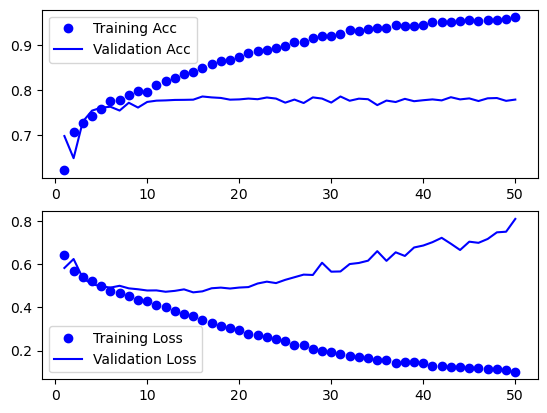

In [63]:
plt.subplot(211)
plt.plot(epochs, history.history['acc'], 'bo', label = 'Training Acc')
plt.plot(epochs, history.history['val_acc'], 'b', label = 'Validation Acc')
plt.legend()

plt.subplot(212)
plt.plot(epochs, history.history['loss'], 'bo', label = 'Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'Validation Loss')
plt.legend()

plt.show()

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [66]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [67]:
train_dir = 'C:/pytest_img/cats_dogs/train'
validation_dir = 'C:/pytest_img/cats_dogs/validation'
test_dir = 'C:/pytest_img/cats_dogs/test'

In [69]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (20,20), batch_size = 100, class_mode = 'binary',
    classes = ['cats', 'dogs'])
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(20,20), batch_size=100, class_mode ='binary',
    classes=['cats','dogs'])
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(20,20), batch_size=100, class_mode='binary',
    classes = ['cates','dogs'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [70]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size =(3,3), input_shape = (20,20,3), activation = 'relu'))
model.add(layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 18, 18, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                262208    
                                                      

In [71]:
model.compile(loss= 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

In [72]:
with tf.device('/CPU:0'):
    history = model.fit(
        train_generator,
        steps_per_epoch=20,
        epochs = 30,
        validation_data= validation_generator,
        validation_steps=10)

Epoch 1/30
20/20 [==============================] - 6s 291ms/step - loss: 0.7054 - acc: 0.5280 - val_loss: 0.6846 - val_acc: 0.5900
Epoch 2/30
20/20 [==============================] - 5s 272ms/step - loss: 0.6786 - acc: 0.5840 - val_loss: 0.6674 - val_acc: 0.6260
Epoch 3/30
20/20 [==============================] - 5s 272ms/step - loss: 0.6640 - acc: 0.6085 - val_loss: 0.6576 - val_acc: 0.6250
Epoch 4/30
20/20 [==============================] - 5s 274ms/step - loss: 0.6349 - acc: 0.6520 - val_loss: 0.6450 - val_acc: 0.6280
Epoch 5/30
20/20 [==============================] - 6s 282ms/step - loss: 0.6201 - acc: 0.6640 - val_loss: 0.6438 - val_acc: 0.6210
Epoch 6/30
20/20 [==============================] - 6s 283ms/step - loss: 0.5839 - acc: 0.6920 - val_loss: 0.6284 - val_acc: 0.6330
Epoch 7/30
20/20 [==============================] - 6s 303ms/step - loss: 0.5805 - acc: 0.7175 - val_loss: 0.6181 - val_acc: 0.6720
Epoch 8/30
20/20 [==============================] - 6s 286ms/step - loss: 0.

In [73]:
epochs = range(1,len(history.history['acc'])+1)

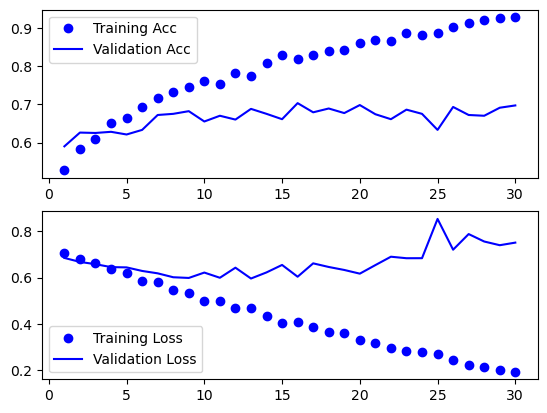

In [74]:
plt.subplot(211)
plt.plot(epochs, history.history['acc'], 'bo', label = 'Training Acc')
plt.plot(epochs, history.history['val_acc'], 'b', label = 'Validation Acc')
plt.legend()

plt.subplot(212)
plt.plot(epochs, history.history['loss'], 'bo', label = 'Training Loss')
plt.plot(epochs, history.history['val_loss'], 'b', label = 'Validation Loss')
plt.legend()

plt.show()

In [75]:
with tf.device('/CPU:0'):
    test_eval = model.evaluate(test_generator)
    prediction = model.predict(test_generator)

5/5 [==============================] - 1s 176ms/step


In [76]:
prediction

array([[0.18444405],
       [0.9980331 ],
       [0.6202304 ],
       [0.66626287],
       [0.81055737],
       [0.9945055 ],
       [0.94655615],
       [0.7699105 ],
       [0.96701396],
       [0.66353786],
       [0.13586403],
       [0.9889693 ],
       [0.98278826],
       [0.9024809 ],
       [0.96552205],
       [0.09724632],
       [0.82145846],
       [0.68005526],
       [0.34338653],
       [0.9871933 ],
       [0.9809661 ],
       [0.07524963],
       [0.9964101 ],
       [0.02366052],
       [0.47130257],
       [0.23606779],
       [0.9947388 ],
       [0.9797528 ],
       [0.39515173],
       [0.03235368],
       [0.05921459],
       [0.40720493],
       [0.7476285 ],
       [0.9241249 ],
       [0.02086376],
       [0.7373273 ],
       [0.8010512 ],
       [0.09833818],
       [0.90041155],
       [0.19841306],
       [0.83243376],
       [0.00336704],
       [0.81452394],
       [0.9146992 ],
       [0.8321552 ],
       [0.3273434 ],
       [0.97884315],
       [0.109

In [77]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range= 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [78]:
train_cats_dir = 'C:/pytest_img/cats_dogs/train/cats/'
file = os.listdir(train_cats_dir)[0]
file_path = os.path.join(train_cats_dir, file)
print(file_path)

C:/pytest_img/cats_dogs/train/cats/cat.0.jpg


In [81]:
img = load_img(file_path, target_size = (120,120))
x = img_to_array(img)
x = x.reshape((1,)+x.shape)
print(x.shape)

(1, 120, 120, 3)


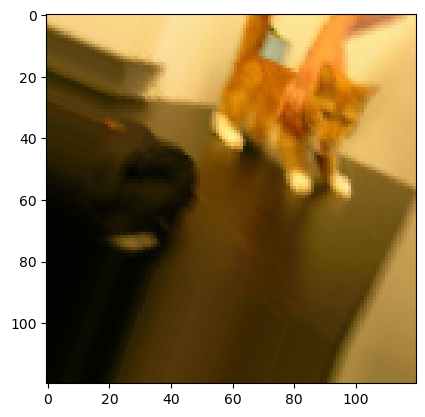

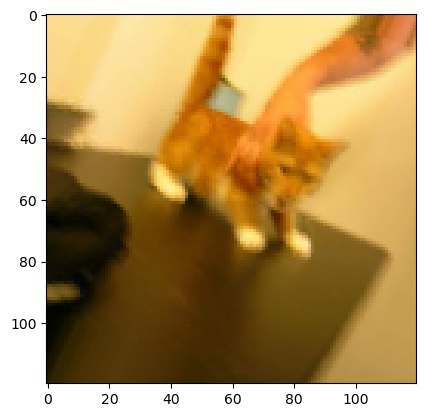

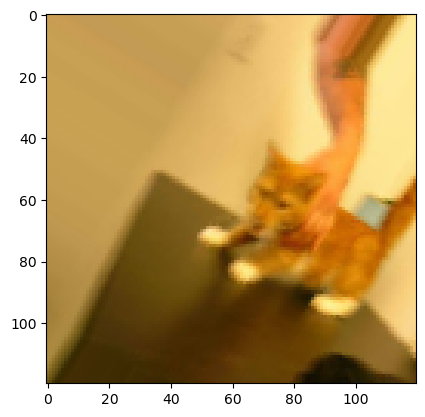

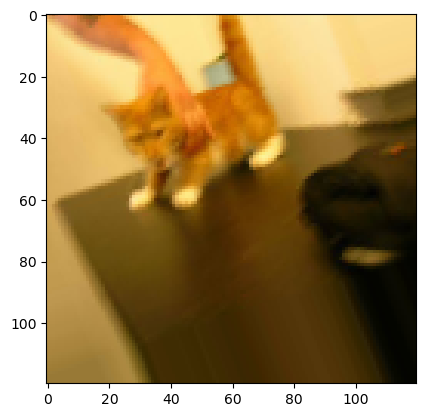

In [83]:
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+=1
    if i%4 ==0:
        break
plt.show()

In [84]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range= 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [85]:
train_dir = 'C:/pytest_img/cats_dogs/train/'
validation_dir = 'C:/pytest_img/cats_dogs/validation/'
test_dir = 'C:/pytest_img/cats_dogs/test/'

In [86]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(20,20), batch_size=100, class_mode='binary',
    classes = ['cats','dogs'])
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(20,20), batch_size=100, class_mode='binary',
    classes = ['cats','dogs'])
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(20,20), batch_size=100, class_mode='binary',
    classes = ['cats','dogs'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
